## PROBLEM STATEMENT-
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)


In [5]:
!pip install spacy
!pip install wordcloud
!python -m spacy download en
!pip install typer --upgrade
import warnings
warnings.filterwarnings("ignore")


[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     --------------------------------------- 12.8/12.8 MB 19.2 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Importing Packages

In [5]:
import numpy as np # linear algebra4
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


Bad key mathtext.fallback_to_cm in file C:\Users\mohit\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\mohit\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key keymap.all_axes in file C:\Users\mohit\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\mpl-dat

#### Reading the data 

In [1]:
musk = pd.read_csv("E:\\deeksha\\python\\data\\Elon_musk.csv" ,error_bad_lines=False,encoding = 'latin-1')

NameError: name 'pd' is not defined

In [52]:
musk.head(30)

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,7,"Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM"
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.
9,10,The most entertaining outcome is the most likely


#### Performing EDA on data

In [9]:
musk.shape

(1999, 2)

In [10]:
musk.size

3998

In [11]:
musk.isna().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [12]:
musk.duplicated().sum()

0

In [13]:
musk.dtypes

Unnamed: 0     int64
Text          object
dtype: object

In [14]:
musk = [Text.strip() for Text in musk.Text] # remove both the leading and the trailing characters
musk = [Text for Text in musk if Text] # removes empty strings, because they are considered in Python as False
musk[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [15]:
musk

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [16]:
##Part Of Speech Tagging
# nlp = spacy.load('en')
nlp = spacy.load('en_core_web_sm')

In [17]:
one_block = musk[4]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [18]:
one_block

'@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!'

In [19]:
for token in doc_block[0:50]:
    print(token, token.pos_)

@teslacn PROPN
Congratulations PROPN
Tesla PROPN
China PROPN
for ADP
amazing ADJ
execution NOUN
last ADJ
year NOUN
. PUNCT
Now ADV
on ADP
to ADP
the DET
next ADJ
for ADP
even ADV
more ADJ
! PUNCT
! PUNCT


#### Filtering for nouns and verbs only

In [21]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[0:50])

['execution', 'year']


#### Counting tokens again

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:2]

,word,count
0,execution,1
1,year,1


#### Visualizing results
#Barchart for top 10 nouns + verbs

<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

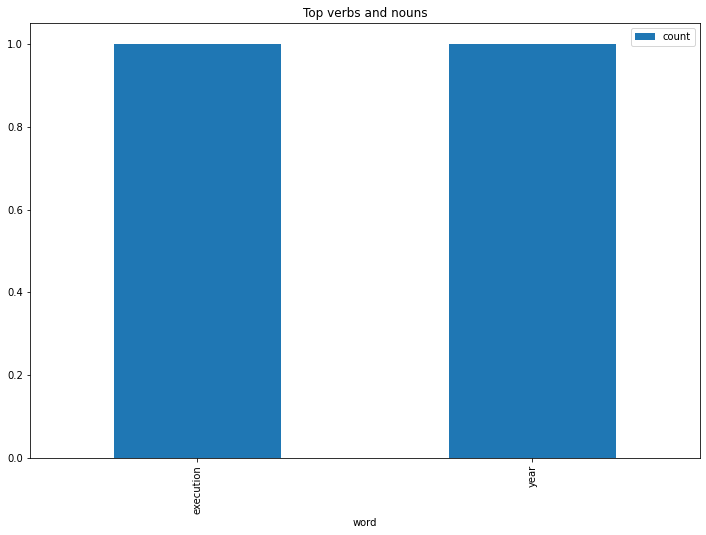

In [23]:

wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

####  checking on other blocks- 

In [25]:
two_block = musk[1]
doc_block = nlp(two_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [26]:
two_block

'@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?'

In [27]:
for token in doc_block[0:50]:
    print(token, token.pos_)

@ID_AA_Carmack ADV
Ray PROPN
tracing VERB
on ADP
Cyberpunk PROPN
with ADP
HDR PROPN
is AUX
next ADJ
- PUNCT
level NOUN
. PUNCT
Have AUX
you PRON
tried VERB
it PRON
? PUNCT


#### Filtering for nouns and verbs only

In [28]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[0:50])

['tracing', 'level', 'tried']


#### Counting tokens again

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:5]

,word,count
0,tracing,1
1,level,1
2,tried,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

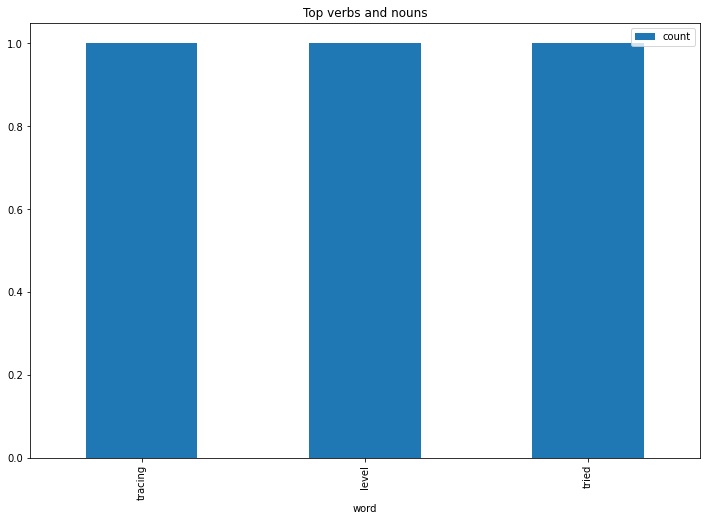

In [30]:
##Visualizing results
#Barchart for top 10 nouns + verbs

wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

## PROBLEM STATEMENT-2
1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining

In [6]:
review = pd.read_csv("E:\\deeksha\\python\\data\\Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")

In [7]:
review.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [82]:
review.isnull().sum()

id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
categories                0
primaryCategories         0
imageURLs                 0
keys                      0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateAdded      3948
reviews.dateSeen          0
reviews.doRecommend       0
reviews.id             4971
reviews.numHelpful        0
reviews.rating            0
reviews.sourceURLs        0
reviews.text              0
reviews.title            13
reviews.username          0
sourceURLs                0
dtype: int64

In [83]:
review.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [84]:
review.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [85]:
review.isnull().sum()

id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
categories                0
primaryCategories         0
imageURLs                 0
keys                      0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateAdded      3948
reviews.dateSeen          0
reviews.doRecommend       0
reviews.id             4971
reviews.numHelpful        0
reviews.rating            0
reviews.sourceURLs        0
reviews.text              0
reviews.title            13
reviews.username          0
sourceURLs                0
dtype: int64

In [86]:
review.isna().sum()

id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
categories                0
primaryCategories         0
imageURLs                 0
keys                      0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateAdded      3948
reviews.dateSeen          0
reviews.doRecommend       0
reviews.id             4971
reviews.numHelpful        0
reviews.rating            0
reviews.sourceURLs        0
reviews.text              0
reviews.title            13
reviews.username          0
sourceURLs                0
dtype: int64

In [8]:
product_review = review['reviews.text']

In [10]:
product_review.dtypes

dtype('O')

In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline


In [60]:
product_review[:10]

['I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead.',
 'This kindle is light and easy to use especially at the beach!!!',
 "Didnt know how much i'd use a kindle so went for the lower end. im happy with it, even if its a little dark",
 "I am 100 happy with my purchase. I caught it on sale at a really good price. I am normally a real book person, but I have a 1 year old who loves ripping up pages. The Kindle prevents that, it's extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books. I finish one and start another, without having to go store. It serves all my needs. I picked this one over the Paperwhite because the price was unbeatable and the only difference that I could see was this one wasn't backlit. A simple book light from the Dollar tree solves that issue. This is my seco

In [16]:
review.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [87]:
# Removing spaces 

In [21]:
product_review = [x.strip() for x in review['reviews.text']] # remove both the leading and the trailing characters

In [22]:
product_review

['I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead.',
 'This kindle is light and easy to use especially at the beach!!!',
 "Didnt know how much i'd use a kindle so went for the lower end. im happy with it, even if its a little dark",
 "I am 100 happy with my purchase. I caught it on sale at a really good price. I am normally a real book person, but I have a 1 year old who loves ripping up pages. The Kindle prevents that, it's extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books. I finish one and start another, without having to go store. It serves all my needs. I picked this one over the Paperwhite because the price was unbeatable and the only difference that I could see was this one wasn't backlit. A simple book light from the Dollar tree solves that issue. This is my seco

In [23]:
len(product_review)

5000

In [88]:
## importing nltk library

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [89]:
## Tokenzing the data

In [26]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(product_review))
sentences[5:15]

['im happy with it, even if its a little dark I am 100 happy with my purchase.',
 'I caught it on sale at a really good price.',
 'I am normally a real book person, but I have a 1 year old who loves ripping up pages.',
 "The Kindle prevents that, it's extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books.",
 'I finish one and start another, without having to go store.',
 'It serves all my needs.',
 "I picked this one over the Paperwhite because the price was unbeatable and the only difference that I could see was this one wasn't backlit.",
 'A simple book light from the Dollar tree solves that issue.',
 'This is my second Kindle (the first being the old Keyboard model, which I put down because I fell out of love with the keyboard.',
 "Lol) and it most likely won't be my last."]

In [44]:
pd.set_option('display.max_colwidth', None)

In [45]:
df = pd.DataFrame(sentences, columns=['sentence'])

In [48]:
df.head(1000)

,sentence
0,I thought it would be as big as small paper but turn out to be just like my palm.
1,I think it is too small to read on it... not very comfortable as regular Kindle.
2,Would definitely recommend a paperwhite instead.
3,This kindle is light and easy to use especially at the beach!!!
4,Didnt know how much i'd use a kindle so went for the lower end.
...,...
995,"While I have Alex Echo (and love this), having a screen that can connect to other smart home devices is amazing."
996,"I love the jokes, random questions I can ask or telling me the weather."
997,Its essential in our house now.
998,"The best part about the echo is that you can actually use it to watch videos, the security cameras connected to your house, listen to music and watch the baby sleep."


In [53]:
#Sentiment analysis
afinn = pd.read_csv('E:\deeksha\python\data\Afinn.csv', sep=',', encoding='latin-1')

In [55]:
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [56]:
afinn[1500:]

,word,value
1500,masterpieces,4
1501,matter,1
1502,matters,1
1503,mature,2
1504,meaningful,2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [61]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import pandas as pd
re = pd.DataFrame(sentences, columns=['sentence'])


In [62]:
re = pd.DataFrame(sentences, columns=['sentence'])

In [63]:
re

,sentence
0,I thought it would be as big as small paper but turn out to be just like my palm.
1,I think it is too small to read on it... not very comfortable as regular Kindle.
2,Would definitely recommend a paperwhite instead.
3,This kindle is light and easy to use especially at the beach!!!
4,Didnt know how much i'd use a kindle so went for the lower end.
...,...
11773,Purchased this for my son.
11774,Has room to upgrade memory to allow more books & games.
11775,But the speakers could be better or located in a better position.
11776,"I had some thoughts about getting this for a 5 year old, but if you get the screen protector and a case I feel it will last a long time."


In [64]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [68]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(re))
re[5:15]

,sentence
5,"im happy with it, even if its a little dark I am 100 happy with my purchase."
6,I caught it on sale at a really good price.
7,"I am normally a real book person, but I have a 1 year old who loves ripping up pages."
8,"The Kindle prevents that, it's extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books."
9,"I finish one and start another, without having to go store."
10,It serves all my needs.
11,I picked this one over the Paperwhite because the price was unbeatable and the only difference that I could see was this one wasn't backlit.
12,A simple book light from the Dollar tree solves that issue.
13,"This is my second Kindle (the first being the old Keyboard model, which I put down because I fell out of love with the keyboard."
14,Lol) and it most likely won't be my last.


In [70]:
sent_df = pd.DataFrame(re, columns=['sentence'])
sent_df

,sentence
0,I thought it would be as big as small paper but turn out to be just like my palm.
1,I think it is too small to read on it... not very comfortable as regular Kindle.
2,Would definitely recommend a paperwhite instead.
3,This kindle is light and easy to use especially at the beach!!!
4,Didnt know how much i'd use a kindle so went for the lower end.
...,...
11773,Purchased this for my son.
11774,Has room to upgrade memory to allow more books & games.
11775,But the speakers could be better or located in a better position.
11776,"I had some thoughts about getting this for a 5 year old, but if you get the screen protector and a case I feel it will last a long time."


In [71]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [72]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [73]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [76]:
# test that it works
calculate_sentiment(text = 'accused  ')

accused  


-2

In [77]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

I thought it would be as big as small paper but turn out to be just like my palm.
I think it is too small to read on it... not very comfortable as regular Kindle.
Would definitely recommend a paperwhite instead.
This kindle is light and easy to use especially at the beach!!!
Didnt know how much i'd use a kindle so went for the lower end.
im happy with it, even if its a little dark I am 100 happy with my purchase.
I caught it on sale at a really good price.
I am normally a real book person, but I have a 1 year old who loves ripping up pages.
The Kindle prevents that, it's extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books.
I finish one and start another, without having to go store.
It serves all my needs.
I picked this one over the Paperwhite because the price was unbeatable and the only difference that I could see was this one wasn't backlit.
A simple book light from the Dollar tree solves that issue.
This is my second Kindle (the

This latest version of the kindle is excellent.
I am jealous of my daughter and now am thinking about upgrading from my older kindle.
The touchscreen is responsive.
If you like reading on the kindle, it is worth the update.
This is a great way to read books on the go.
There's no backlight, so reading in darker rooms may be hard.
But it's affordable and portable and a great way to take all your books with you.
I love the Kindle, it is a great product.
It reduces eye strain so I enjoy reading on it.
This is my second Kindle.
i bought this as a backup.
I am currently using the same headphone.
We got the Kindle for our daughter who accompanied us to try out the two Kindle models.
We were willing to buy either one and we assumed she would want the more expensive one with the backlighting feature.
But as she tried both, she gravitated with certainty toward the basic model.
"Why would U want to read in the dark?"
She said.
As the weeks and months have gone by, she says she's completely happy 

Speakers should have a capability to be used as Bluetooth speakers like the echo.
I have the spot, dot and two shows, I started out with the spot and loved it so much I wanted a bigger one.
This was a (Best Buy) !
No pun intended lol I was a little hesitant to spend the money to get this but I am so glad I did!
Alexa always answers when I say the commands and I have noticed it is probably 95% right with any command that I have given.
Love the fact that I can see things on the screen.
Some of my news briefings have a picture/video so that's nice too.
We also love the video call option.
Planning on getting one for my grandma who is not as technologically advanced, and could just sit at a table and talk with the grandkids.
Worth every penny.
Great product, very much recommended.
Service at Best buy is always the best I bought 2 of these for gifts.
I love my Echo and think the new one will be incredible too!
After the holidays, I will buy one for myself!
I can watch videos, check my securi

Another great product by Amazon, super fun and great for entertaining the family and guests.
Great product fun to use.
Very easy to set up and begin useing Gift for a relative they said they loved the gift.
Same as echo but with a screen which adds to the appeal to this product.
Purchased this because I was buying the echo dot for my daughter and thought this would be fun for the family.
We play music every day on it.
Every one in the family is enjoying it.
Only dislike is that it doesn‚Äôt have the hub.
I live the echo show!
So easy to set up and use.
I have one in the kitchen and one in our main bathroom.
Alexa may be new, but I would have thought some of the simple commands she would have been able to respond to already.
For the amount Amazon charges, it should come with better instructions, including what specifically to download into one's device (iPhone, etc.)
so as to make some apps ready to go.
Amazon dropped the ball on this one.
I previously owned a Nucleus device which was s

While I am sure that being a bedside "smart" alarm clock was not the primary goal of the Echo Show it does fit the bill nicely.
This was my first Echo purchase and now I have multiple Echo's and HUE lights.
Great system all around!
She is Alexa, better younger sister.
Love her, and some of the new skills great The show has a good picture and good sound...love using it to look things up This is an awesome product.
This is the first Echo product I owned and I purchased 2 to get $100 off.
I was going to split with a friend but like this so much that I decided to keep both.
I've being singing along with the stream song with lyrics while doing work in the kitchen and house and watching youtube videos.
The videos on Youtube takes a more effort to find the ones I want but I think this will improve over time.
This Echo Show comes in handy.
I use it almost as much as I thought I would.
I am still learning all that it can do, but my favorite part is the screen.
It‚Äôs not a huge deal, but if I c

Also you can tell it to volume up or down as well.
Another new modernized technology it has is the capability to do hands free voice command Smart Home options.
A couple things that could be improved, is sometimes that it does not fully hear your exact words, and it will search for something you aren‚Äôt expecting.
The other function it could have is it could have single voice recognition to only several voices, so then you don‚Äôt have the entire room trying to mess with it constantly.
The price is also fair as well, for its creative capabilities it has.
So if you are trying to find some new technology to add to your home the Echo Show would be a great addition for you.
Love the echo show so much!
Easy to use, connects to your mobil phone to easily call people!
9.5/10 Rating !
This has to be one of the best AI products I have used in a while.
The screen for an smart home device can be very useful.
It really can't compete with the Google home because the Show just brings convenience wi

I'm planning on setting another one up at my 93 year old mothers house.
She'll get a kick out of it also.
Bought 3 of these for Christmas for my Family members.I‚Äôve had mine for a year in my Kitchen and just love it!So much you can do with it and works great with my 5 Arlo Pro cameras.Big plus...Amazon is Always updating the Show to do more.
Despite a less than friendly price point (if you don't get it on sale), this Amazon item is well designed and delivers on the promises in the hype and product description.
The emphasis with this item is "show", so it's no surprise that sound quality does not compare with the Echo, but if you want the convenience of a voice controlled screen other than your phone, this product delivers.
It's value is even greater when paired with other smart devices such as security cams.
Another added bonus comes when friends or family also have a Show, so that you can do "drop in", which is essentially visual phone calls.
It's great for checking on elderly famil

Amazon has made another great product!
The ‚Äúshow‚Äù goes perfectly in the kitchen!
Recipes, music,weather!
All done hands free!!
Fast set up!
I bought these as a gift for my adult kids to video chat while in college.
The second best feature was YouTube.
Amazon just sell google home and chromcast for goodness sakes!
Another great echo product... really cool feature is the lyrics scrolling across the screen when playing music!
It works fast and very clear, speakers sound amazing, looks great in bedroom.
I have several versions of Amazon's Echos - the original, and Echo Plus, 2 Taps and 2 Dots.
The Show is the best sounding of the bunch and you have the screen as a bonus.
I added a battery pack to make it portable and it's perfect for us.
I love it.
It does so much and is so easy to use.
I use it mostly for music and questions.
I love the Echo show.
I have found so many uses such as weather updates, recipes and random questions.
My grandkids love it for stories, songs, pictures and just

Love this product easy to use and it does so much ch purchased the show after I picked up the ECHO PLUS, 2 DOT'S & a TAP!
This smart home system is addictive and I will be adding more soon!
Does what it is advertise for and more.
Had fun setting it up and amazed on what it can do.
I even use it for security.
Love the ability to video chat with grand kids, Enjoying the music everyday.
Its an awesome item.
Me and the kids love it.
Great product.
Use it in the kitchen and can see who is at the front door with it being connected to my ring doorbell.
Recently divorced I bought 2 of these tonserve as homebase for me and my 8 year old.
It has helped him to know there is one spot in both our houses he can reach me by simply saying drop on daddy My wife purchased this for me at Christmas.
Was very surprised because she said she did not want a device like this in the house.
I think she is enjoying it more than me.
Easy to link with nest thermostat and smart plugs.
Even figured out how to operate

We put in the kitchen for the holidays and used a lot of new recipes Alexa found for us I like how it has the screen but I do like the echo plus better.
Both gets the job done Got for my parents as a gift.
Simple to use and they like it.
Got on sale so was good value.
I use it alot to play music instead of running the tv for my dog when we go somewhere.
I use it for a lot of things.
Bought my 5 daughters each one for Christmas & one for myself .. love the concept Great video quality, sound/music from a rather small device.
Seems well made, entertaining, and more functional as we learn its many features.
Bought for my parents, they love it.
Easy to use and setup Haven‚Äôt set it up yet but really looking forward to using it.
I have a regular Alexa and love that ,so This should be even better!
Echo show has proven to be a handy gadget... useful for lots of things, like checking weather and just about any info on the web...also has great interfacing with other smart tech, like arlo camera

Love the screen!
Bought the Echo Show to add on all my smart wifi appliances, wifi video doorbell, smart TV & sound bar, wifi smart lights, wifi smart thermostat, wifi security camera system and so on.
Great overall, would be nice to have parental controls though.
The sales associate was knowledgeable enough to lead me in the right direction in purchasing this product that‚Äôs compatible with my mother‚Äôs Arlo Security cameras.
It works great!
I bought 2 shows and I am loving them.
Them video flash briefing are wonderful and personalized.
I don't have to keep my phone on me 24/7 to keep in touch with my closest family members; they can just drop in and I can do the same with the kids when away from the house.
I made 2 more purchases immediately after to put them in my office and living room.
I love the lyrics when music is playing and looking at the forecast on the fly.
They are a must have for a modern home.
Enjoying Alexa!
There is so much you can ask her!
Looking forward to the sec

Right now it doesn't allow YouTube, but hopefully they will reach an agreement and fix that.
if nothing else I have peace of mind that should she fall or need assistance then I can now better assist My mother has dementia and this keeps her busy for periods of time.
She is fun to have around.
Just got this in the mail last night.
Setting it up today and I want to love it.
The kicker for me buying it was being able to connect our Arlo cameras and view instantly.
The display in the store had great sound.
love it and it only keeps getting better over time.
Great product, i recommend is easy to use and fast.
Nice way to see the internet and also to view security cameras.
Very handy device.
The Echo Show is a version of Alexa with ability to visualize things.
When I was cooking dinner and wanted to finish a show, I was able to ask Alexa to play the show from my Amazon Prime account.
The Show was in my kitchen, easy to view, and enabled my kids to watch cartoons in the living room.
I love it

Video calls work great and the screen is super informative.
Between this product and Siri, AlexaIs much more useful and reliable.
It controls many things in my home and is very dependable.
Only one problem... commercials activate Alexa when it hears them.
I didn't think I needed Alexa to have a screen, but now I'm so glad we got this.
When I ask to see my grocery list, it pops up on the screen.
Also can do video calls from it.
Really like our Alexa and the dots...we have them in almost every room of the house now.
Wish the angle was adjustable.
When this is sitting on a table or counter it is angled up and the further away from it you sit, the less likely it will see you in its view when trying to call someone.
Love the Sirus XM update to play through this though.
The speaker seems louder and better than the regular Echo, but that is just my thought.
If you were able to get two for price of one, this is a deal worth taking.
We use it to talk to our granddaughter, play games, listen to 

Works very well.
Very cool - It fully incorporates all of my Smart Home products Very happy with adding Alexa to the kitchen!
The Echo Show is great for looking up recipes, getting a weather and traffic up as I‚Äôm getting my morning coffee or just listening to music!
Great for video calling grandparents who are not real tech savvy.
They also enjoy music on demand.
Less than useless Does not work with Amazon CloudCam.
I purchased this from Best Buy to allow me to monitor my two Cloud Cams from my kitchen.
I am VERY tech savvy and have numerous Alexa devices but have been unable to get it to work.
I tried installing and enabling the Amazon CloudCam Skill, made sure there were no new updates for the Show (the Show automatically updated when I first plugged it in).
The final straw was when the tech support rep told me you can‚Äôt use the Show with the CloudCam‚Äîand then was unable to connect me with someone who could actually solve the problem.
Useless is no help; less than useless actua

This product is amazing.
I do however wish that there were more video features on it!
I love my Echo Show!
Easy to set up!
And fun to use!!
The echo show is a great accessory to any house .
It has a great picture on it and great sound .
It‚Äôs simple to use .
My wife uses it for recipes when cooking and making grocery lists .
Also listens to music with crisp sound.
Can ask Alexa pretty much anything .
This item seems great on the ads, but it reality it can‚Äôt do nearly as much.
To get it to do more you have to download ‚Äúskills‚Äù, some of which work well and others of which do not.
Some are reviewed, but many are not.
Connecting is often difficult and sometimes the password you use has to be the same as your Alexa device (which no body tells you).
I‚Äôm sure with some practice this device will be fun and useful, but learning to use it and sorting through the skills is a pain.
Upgraded from echo to this and this is just what I needed.
Works well with my new Ring door bell and securit

Like having a robot brain in your house.
Alexa Show is really well put together.
The main reason for my purchase was to create my own 'surveillance system' linking my Ring Doorbell, and Ring Floodlights to view on command by Alexa on the Show Screen.
Yes, you can talk to it, and get results for almost any query, but with the show, you get a lot more.
The touch screen is great for video calls, especially when you install the Alexa App on your family cell phones.
Alexa can scan items via UPC and order them on Amazon, or tell you where to get them.
The recipes you ask for are not only spoken to you, but SHOWN to you.
Also, when music plays, you can see the lyrics on screen (If you use Amazon Music to play the music).
You can ask for a news briefing, and you SEE the news, highlights, etc.
The speakers aren't quite up to the same standard as the echo series, but it's close.
The sound fills the room nicely.
When the Echo Show is not being immediately used, the screen shows a picture of your 

I use the echo show to stream music, video chat, and drop in as a camera from my home.
You can even see recipes and other items.
Worth the money, got it on sale!
I always wait for sales.
at first I wasnt sure if this was something I "needed" when I already have the echo but it was on sale for black friday so I thought why not.
As soon as it was set up I understood why I "needed" this.
It just enhances everything Alexa does!
Being able to see what she says is great!
Seeing and adjusting my shopping list by touch is amazing.
I love walking in the room and seeing little news blurbs.
It looks sleek and beautiful on my counter.
I highly recommend this to anyone.
Each and Every Version of Amazon Home Products have gotten better and better.
This Amazon Home is the Cadillac of Amazon Home Products.
The News Feed on the screen at all times along with the options and features that you can do with this is amazing.
I love the ability to call my mom and dad and see what they are doing.
They are onl

But, who wants to have to call for help every week or two to keep things running.
Alexa should be able to talk you through how to resolve her issues.
All in all I am getting used to the features and like it.
Alexa runs my entire house.
The Echo show is a great addition to the Echo family.
Everyone needs one!
Staff was very helpful and polite !
Went in asked for help and was pointed in the right direction!
Absolutely love this.
We got the lights and they have worked so great.
Great Smart speaker for my 90 year old mother in law.
I‚Äôm an amazon prime member and the show is awsum I use it to communicate with the son who lives in Seattle.
You can watch amazon pirime tv,play amazon music.
Text, play games read the lyrics while the song is playing.
I love it We loved the Echo Dot, but the Show is exponentially better.
Especially love to see the words of the songs being played, and views of places all over the world we want to see.
Big difference in cost between dot and show, but worth it!
L

This does the same things as the other echos but has a screen.
The sound is comparable to the echo which is good.
The screen is small, not hd, and not touch screen.
You only can call other echo users.If you have an echo don't run out and buy you can do all on a laptop.
If you are looking at an echo having the screen might be worth the extra bucks, Upgraded from echo to this and this is just what I needed.
Works well with my new Ring door bell and security cameras.
Love the versatility of this.
Alexa is great and even better with a screen to show you all your searches and videos First bought the Dot to see if we liked it.
We enjoyed it, but wanted a little more volume.
When I saw that the Show was much louder and had the camera we decided it was the right choice.
Now we have the Dot in the bedroom and the Show in the living room.
For larger rooms the Show is a great choice.
Great product will recommend it to friends and family.
I was hesitant, and I am now hooked.
This is both fun and u

It‚Äôs a lot of fun.
Great speakers too provides a lot of great information and fun too!
Really enjoying this device so far,,,my smart phone is basic Tracfone...currently adding smart lighting...will probably switch to a tablet for controlling and adding to a future (limited) smart home Great item, we love our Echo.
If only she could mow the yard for the kids.... Alexa walks you through every step which I found helpful.
We have sonos speakers and a Honeywell Lyric thermostat.
It took a little searching on google to get things linked.
Now that they are linked we can play music in any room and change our home temperature by using Alexa.
I'm not a techie, but after days of trying to hook up, I gave up.
I don't know if it was the Echo Plus or my carrier ATT Uverse causing the issue, but it would NOT connect.
So, back to the store it went.
Even with checking out blogs on the internet for assistance...none of it worked.
Alexa Is amazin.
I love the features their great.Just love it This speak

I‚Äôll update after use Love my Alexa!
Having lots of fun asking her questions and enjoy listening to music on it.
I also have the smaller echo and this sounds much better.
Love all the features!
They are both responsive to each other and it gives me convenience.
I don't have to turn off the lights and all I do is lay down and ask Alexa to turn off the light.
All my lights are connected to my Echo Plus.
My family have enjoyed ALEXA in the house, she is very smart and she does lots of research for the family!
We are truly glad that we made the purchase Great entertainment when friends are over.
The knowledge and jokes are tons of fun.
This is the second one I‚Äôve bought this year for gifts This Alexa series 2 sounds better and preforms better than the previous model.
It picks up the voices 10x better and the sound quality is on a Bose level(fills the whole room).
Me and my family spends more quality time on the product!
I have had the competitive products and nothing compares.
Alexis i

The Amazon - Echo Plus is good buy it buy it you will love it Fun gadget.
Plays songs, various entertainment, still learning all it can do We purchased 3 of the Eco Plus and out two adult children really like their Eco Plus.
They are having a lot of fun with it we are still learning Great item and easy to use.
Very helpful and entertaining Excellent product.
Turns on and off supported devices by asking it.
Live walking into a room and asking Alexa to turn on a light.
Poof it‚Äôs done.
Or locking and unlocking the front door.
Arming and disarming my security system.
If you‚Äôre looking to turn your house into a smarthome I strongly recommend the Amazon Echo Plus Received an Echo Plus as a Christmas present.
Absolutely love it.
We went back & purchased a Dot & more light bulbs.
Salesman told me the big one was better so I bought it.
My daughter gave me the small one for Christmas.
Does the same thing.
Salesmen are apparently undertrained or a bunch of liars!
I love this product and plan 

Takes some getting to use to but patience and practice and males all the difference.
The first one was not working so we had to take it back and get a new one Great product.
Didnt realize it‚Äôs compatible with different items We use Alexa for so many things.
We use it for shopping list, music, lights on or off, even Trivia games.
Christmas gift for my son and my husband.
Can‚Äôt wait to hook it up Works great and we like like the light that came with it., Not one issues so far!
My wife and I love the Amazon echo plus it‚Äôs very easy to control the hue lights in the house that we have set up I would recommend this to anybody we love it.
We also play a lot of music on it.
We never received the light bulb.
Very happy with Alexa just not happy that the bulb was not sent.
It has very limited use without adding on expensive Apps or adding more wireless speakers.
I am considering returning the merchandise Bought this for my son and one for my husband and me.
So easy to set up.
Very helpful.

The salesman was a tremendous help.
I bought this for myself and another one for a gift, you must have Wi-Fi to use as well as a smart phone.
Good product and wasy to set up.
Works well with smart lights.
This is great for inquisitive minds.
Alexa plays music, turns the light on, answers questions and so much more.
ECHO PLUS OFFERS SO MUCH MORE FOR THE SMART HOME., HOWEVER, I HAVE HAD THE DOT FOR A LONG TIME AND YESTERDAY I BOUGHT 5 ECHO DOTS FOR MY CHILDREN .GREAT PRODUCT.
great sound.
Love the music and the electrical devices you can work with it.
My home is about 80% automated with help from ALEXA...We want to have one in each room.
I really purchased this for my wife to use as a Bluetooth speaker knowing that maybe we would find something else for it to do.
I'm glad I did, now.
We have Christmas tree lights going off and on, lamps dimming at precise measures, "Alexa, light 30 percent", and am looking at the other many, many things that this can do.
It's easy to setup, too.
Easy to 

Echo plus is great for home use, to ask questions and turn the lights on when you away.
I am not the most tech savvy person and found this very easy to get set up without any help.
It great to have in the home it has become invaluable Excellent combination and easy to install and setup.
When I tried to hook it up it wouldn't recognize my internet.
I will have to contact best buy when I get home and have their guys come out to see if they can get it working Surprisingly entertaining, and a diverse selection of apps make for a fun addition to the house.
Adding lights and enabled plugs adds to the fun and practicality as well.
Set up was simple.
We liked so much we bought one for my Mom Great product.
I use it everyday.
It‚Äôs a great way to automate your home Very happy with amazon not hesitating to integrate their products with third party integration.‚ÄùCrestron I looked at Google Home .. And the Echo.
I went with the Echo after I spoke to a Best Buy employee.
They helped me sort out t

As advertised.
Easy set up and integration.
Haven't tried to use the hub yet but it is limited in the number of products it works with compared to Samsung Smartthing or Wink 2.
Love the bigger speaker and the quality of sound with this product.
Like turning on bedroom light with Alexa.
I usually unplug it but when I plug it back in, it is always difficult to get it reconnected to the internet for some reason.
I purchased this to pair with my other echo while I enjoy my other 2 echoes I must say there is a noticeably difference with the echo plus and best buy had it at a remarkable price better than amazon so it was win they amped up the speaker like the Alexa but needs to be more interactive like suri.
Enjoying using Alexa.... and love the smart home features.
Fun item and helpful to do things around the home.
I have not had a chance to use the HUB function on this device, but it was easy to set up and get running, still learning how to make it work with the other echo devices, but ove

Making our home smart and adding Echo has been great!
So convenient!
I purchased two echo dots for Black Friday, once I loaded my XM I found the shortcomings.
The volume was not load enough.
Went back and picked this up and it filled up the room.
The dot was moved to the bedroom were it was load enough for the small room.
This is the hub dollar my smart devices and it worksThis is the hub dollar my smart devices and it works Have just started using Alexa and am looking forward to all the other things that are available to use with the unit i was weary about it at first but it was easy to setup and get the hang of and definitely makes life easier!
The amazon echo plus has worked great.
We like the smart bulb with the echo.
We are so happy with our Alexa!
We are very technologically challenged but she‚Äôs been great!
Already have the echo and dot.
Has good sound quality and with the hub feature you can control the hue lights with Alexa which is convenient when walking in the house with a

It really can control anything!
We know that our grandchridren are going to love themWe love ours This is a pretty good all-in-one starter for a smart Home set up.
It‚Äôs fully functional and doesn‚Äôt require a separate hub purchase for other smart Home devises.
This smart bulb works with Amazon echo Plus.
It can be turned on and off and also dimmed.
The echo Plus is amazing - can play music, control TV and answer many questions.
The Echo Plus is great.
‚ÄúAlexa‚Äù is the best feature.
The only problem is, you can‚Äôt use it wirelessly.
It must remain plugged in at all times, which is kind of annoying.
Great improved sound and built in smart hub is so useful.
i purchased this to go along with my smart lights.
it links up right away.
i am satasified with this purchase.
WORTH IT I LOVED WELL INVESTED MONEY.
ALEXA HELPING ME A LOT, REMINDERS, LISTEN TO MUSIC AND MAKING MY HOUSE SMARTER, SIMPLY AND EASY, NO REGRETS:-) I absolutely love Alexa!
This device is loud, easy to install, and does

I would recommend.
You get what you pay for.
Playtime works when it wants to.
Went on a long trip and the videos we downloaded had issues playing most of the time.
My son is almost 2.
He gets bored of it quickly.
The pros are the price and it is well protected externally.
This is the best tablet I've ever purchased.
The screen is amazing and very functional and the kid mode is easy to get to and my 5 year old loves it makes me jealous and want to get a kindle but that's ok I can use parent most while he's sleeping.
All over a really good tablet for both parent and child Got this for my daughter 2nd birthday and she absolutely love it.
I've had kindles for years and this latest one is also right up at the top Bought this for my six year old grandson.
The set up was very easy.
He is able to download kids only stuff and can send us videos of himself using the app.
He just loves it.
Truly kid friendly.
very good product and service will refer a friend.
It has a great camera and I really en

so I probably used it a tot this week.
I was watching my 3rd Primetime video this week and it simply turned off.
It will not turn on using any power trick such as safe mode.
It is gone, It is toast.
Bought it October 11, 2016 , It quit on February 9, 2015.
My old Fire lasted 4 or 5 years with more use.
it had stereo speakers, lasted a week on a charge not 2 or 3 days.Sturdier built.
This is full of junk, I am not just offered more apps, it is constantly trying to add them.
JUNK JUNK JUNK My child loves her tablet and I love it.
It keeps her busy with learning games and books I love my Amazon Fire tablet, I bought this all the while knowing that people had negative reviews...
But honestly I don't know what they did to theirs because mines doesn't have any issues...
I've had mines for over a month and still working perfectly like I just bought it yesterday...
It's simple and not difficult for young children to learn.
Also is build sturdy in case it does get dropped more than a few times.

Excellent product,my children love this item.
Thanks So read reviews on a few tablets but honeatly felt this was the one for my kids bought it and sure enough it was it best apps for kids especially reading for kids amazon did a good deal on this and if you have prime it links up with your account for videos too After reading the reviews and also seeing in the description that this has a 2 year unconditional warranty we were sold.
Our child loves this tablet and he's dropped it many times with no damage.
The thick padded case really does work wonders for this.
My son's love there tablet.
Great but for the price Bought for my 3 year old and she loves it!
Haven't had any issues!
Purchased one for my older son last year....Got this second d one for the younger one so they don't fight over them.
Overall it is a good tablet, but I am not a fan of the limitations of the silk browser and Amazon app store.
I like the tablet; however, there are occasions when it does not boot up when it is turn

If you like to read in the dark then get the paperwhite version.
The LED's are a nice touch.
it has great durability, but lacks great sound.
The picture quality is just ok Have not used the product.
This item was a gift and I have not yet received word on the product.
I am very pleased with this purchase.
It is lightweight and the smaller size enables me to carry it easily.
This Kindle allows me to read out in the sun without any glare.
The only suggested improvement would be a lighted display to enable reading at night.
Very slow performance and sometimes applications freeze up and don't work very well , charging port very low quality i bought an amazon fire 7 tablet for my 7 year old granddaughter and she loves it.
it is easy to operate and charge.
What a great tablet for for the grand kids.easy to use,can't say how many times it's hit the floor and no damage.
This is really good if you read a lot, doesn't strain your eyes and very light weight.
Only demerit is - cant use in night if

A must buy for kids Bought 2 of these for my 6 and 8 yr old and it said it came with 32gb storage but actual storage was a little less, cant remember exactly how much probably around 20gb with the other necessary programs that come already pre-installed.
They mainly use it for games and have downloaded many games on them.
There is room for external storage and it also has a front and rear camera.
love the product.
comes in different color as well.
I got the blue!
Got it as a gift for my grandma and she loves it!!
Upgraded from a galaxy tablet that was 4 years old.
So worth it.
The touch and loading the content is very bad, it doesn't respond quickly and it very slow Easy to use!!
Purchased for my nephew, he's 4, he loves it.
This is great to occupy your child on the long road trip or just when you need a break from entertaining the little one.
Works great and they can damage or mess up their own toys without using your cell phone or other adult device.
My grandson really enjoys this ta

Has all of the features she needs.
I don't think there is a better tablet on the market and the value is incredible.
My husband and I purchased 3 of these for each of our kiddos and to say they're a hit would be a massive understatement.
And the parental controls on these are awesome.
We love our new Fires!!
tablet is so user friendly and a price you can not beat I had the 4th generation.
I am quite happy with the upgrade.
Good battery life Bought this for my adult son who had a long flight and he absolutely loved it!
Definitely recommend!
I got this for my two grandsons (ages 2 & 4) for Christmas.
They love them.
I would recommend this to all of our friends and family.
It's worth every penny.
Good warranty, comes with a free subscription, works quickly and is very durable!
I bought it for my 2 year old and he loves it.
It's easy to use and the perfect size for his hands.
This is a great tablet if you have reasonable expectations.
And you should definitely pay the extra $20 (for a tota

This works.
Saw it for a really low price so couldn't resist otherwise we would have gotten the padded kids version.
This is my son's 4th kindle.
It is reliable but the charging plug area wears out quickly This tablet is great for my son.
Would be nice if it had a little more horsepower Great learning tool.
Kids love it and so do I.
So fun to share time with the kids laughing while learning.
a gift.
He LOVES it.
was a reasonable price.
thks.
I prefer the Kindle to a book.
I like the change of letter size, storing many, many books, and the ease of carrying it.
I love to read when I travel, and this is the way to go.
When I first bought it and got it started it wouldn't register my amazon account.
I tried making a new account and I tried using my moms account but it would not work so I took it back and had geek squad look at it and they claimed it was defective and exchanged it for another one and the new one works wonderfully, haven't had any issues with it yet.
i just love every thing 

It's easy to hold, has amazing battery life and has a pretty decent screen.
Sure the Galaxy tablets have better specs, but it's the price and features you get from Amazon that make this device amazing!
I got the first version for my sister and she hasn't been able to put it down on over a year.
Then I got her this one and forget about it.
Great new features, she loves loves loves it!
My son washed it twice!
Throw it a few times and it's still ticking.
Perfect for my son!
He has fine motor deficits and the games definitely help him work on using one finger at a time to play them!
I also don't have to worry about him getting onto anything that isn't kid friendly since he doesn't know my passcode for the adult profile!!
Got 2 of these for Christmas gifts for our grandsons & they love them!
This camera is a great addition to my home I really like it This e-reader meets all expectations and has a good feel to it.
I bought this one for a family member because I loved mine so much!
She was ve

Bought this for a work fundraiser and the recipient enjoyed it Moved all the ad apps to a folder and loaded what I wanted.
Small size fits in my sport coat pocket.
Bought 2 for each of my children ( 10 & 15) and they love them.
I was a little worried about them adapting to a new operating system, no problems there.
The sound and playback images are just fine.
They take them everywhere, not like leaving their other tablets at home, I'm thinking about buying me one.
Very kid durable The tablet is great and I like the warranty that it comes with, but I don't like the charging port.
The wire that comes with the device is too short and will not fully snap into the device.
Which will not let you charge the device unless you place it very carefully in the right position and then don't touch it.
Had to buy an after market cable with an 8mm plug length to get it to charge.
We bought 2 of the tablets and they both did the same thing.
On one of the tablets we bought one of the magnetic plugs so t

I was not a fan of the Amazon type operating system that is on the tablet.
Ended up taking it back because it was not what I wanted, not as easy and supportive of games and apps as an Android tablet.
I love my amazon fire tablet, I'm sure my kids will love theirs too!
Purchased for my Father In Law - this was the most frustrating experience.
Not user friendly - not friendly at all.
Stick with a name brand tablet - Apple, Samsung, etc.. Avoid this device at all costs.
My son is very happy with this and so are mommy and daddy.
No more asking for our phones and setting the time limit is awesome I was very impressed with the functionality of my Amazon Echo.
Very useful to have around the house and for the discounted price, it a steal!
I upgraded to have more memory and this is a great little tablet.
Works great and does everything I need it to do.
Used it for learning apps for my 3 yo other than the fact that she put it in the dryer (while I was throwing clothes in there) and completely br

It uses their version of the Android OS which they call the Fire OS which is decently responsive and fairly intuitive to use - Be aware that you cannot install or run most apps purchased from the Google Play store, but must rely on Amazon's own app store which is decent, but not as extensive as either Apple's or Google's.
I bought one for my boyfriend and one for his son.
It's fast and easy to use.
Easy-to-use.
Lots of books obviously but also lots of apps.
The display is not as sharp and vivid as they say but still good.
Probably better for reading than watching videos.
We didn't really get it for the games, but there is a good selection.
WiFi works well and internet browsing is fast.
Wanted a tablet that would fit in my purse.
Very easy to use.
Would buy again.
I hate amazon app store.
Nothing good in there.
The tablet is too slow for what I do... it is good for reading only.... Not the fanciest tablet, but it definitely gets the job done!
Bought as a gift for a friend that wanted an

Great learning experience !
I bought this tablet for my son.
He damaged the previous one but it was good for his purpose.
He loves to play the Minecraft app and can read a book with ease.
I don't have a tablet for myself.
If I did, I would get the Fire.
All I would really need it for would be to surf the Web and use the apps.
For the price, u can't go wrong.
I have two kids and they both love it.
Its also nice because it is already setup for them.
Since I purchased mine the wife thought she would also like one so we picked up her one and she is using it a lot.
Got two for my kids for Christmas and they're awesome!
And also got lucky they scanned to $20 less than advertised price!
Woo!
Awesome tablet for young children.
They love to play all the videos that it came equipped with already on it.
The parental controls are amazing!
Super easy for my daughter to operate What can I say, if you enjoy books and magazines it's hard to beat.
Not backlit but not an issue for me.
I take it everywhe

This was a Christmas present.
The person that received it was very happy with it.. She has other Kindles but this new one is an obvious improvement over the previous ones.
The Fire tablet is great, we just bought our second.
It's screen is pleanty big enough to see, but small enough to fit in my jacket pocket.
This tablet is perfect for my mom.
She primarily uses it for playing games, the calendar and taking pictures.
The camera is a decent camera for a 7" tablet.
Hopefully she'll use it to read books and magazines as well.
It was too slow he didn't put any attention to it.
Battery didn't last.
Good to use it to read books under light.the price is lower than other website.
Give this product a 10 tons of great learning programs.
Loved the Fire HD7 but the latest HD8 is sharper, faster and still handles great.
This tablet is very good for my daughter of age five.
I like the way I can read many books and magazines as well as play various games on my kindle.
Video quality is very good.
Wor

Easy to set up, great picture love it!
Keeps my kids entertained and they love it also ....it was a gift.
I love to buy stuff at best buy Most of the employees are great at helping With everything i needEspecially JISSELA I can read just about any book that is published and not leave my house to go to the store and have to buy them.
It ended up being the most popular gift that she got it does a wonderful job for children My grandson loves it.
Will be getting another one.
These are great tablets for the kids and the price is wonderful with the warranty and the soft, yet bulky (a good thing in this instance) case.
The only thing I wish, was that it could access the Google Play Store so my kids could watch the movies we have in our Google Play Movies account.
Awseome tablet for toddler.
I would recommend this tablet for all age groups.
It's a really good tablet for children good parental controls expandable up to 128 gigs I like that so it allowed me to download as many things for the chi

If you really want to have a good read on something digital this is the item you're looking for.
It really is lightweight and highly functional.
The battery lasts a long time and the screen is easy on the eyes.
The only difficulty sometimes is reading in extremely bright environments.
Overall an excellent buy.
We love the parent controls and durability.
We would definitely buy another.
I purchased this Kindle for my wife because her Kindle Fire gives off too much glare to use in sunny conditions.
Besides being able to use it while riding in the car during daytime, the biggest advantage she found is that it is significantly lighter than the Fire.
Since she reads for hours on end that is a big plus.
The main drawback is that the graphics aren't as clear with this reader.
All in all, it was money well spent.
Good quality little tablet, great for kids.
Locked down and does not run full Android so you cannot use google play store apps.
The price for this tablet is not the only great selling

The bumper is amazing.
i bought this as a backup.
I am currently using the same headphone.
My 2 1/2 year old loves this.
He can't break it with the thick rubber case, and we can control the games he plays, and how long he plays.
Great mix of educational and fun items.
The only problem is the charging cord is a bit too easy to break.
If they pull it off the charger, it makes the port loose and you have to get the right angle for it to charge.
Easy to navigate.
Daughter loves it.
It's lightweigh and its just what she needed for this avid reader.
Looks pretty solid will update review as soon as gift is opened .
My first Kindle and I love it.
No backlight and perfect view in the sun are awesome.
Bought this for my 4 yr. old for Christmas, she loves it and is very easy to use.
The battery lasts a long time A little more complicated than my original kindle, but I lIke it.
Once the games are downloaded it was great for long road trips.
Plan to buy a second a second Amazon Kindle for a hi e ye

This has taken some learning to get used to a slightly different format, but it works great!!
The price point is perfect for kids to use without the worry.
Purchased this for my Down Syndrome sister who enjoy playing games on it.
Very rugged design.
My nieces absolutely love this.
Great tablet for the kids and adults great features like the rubber case and free features for kids My granddaughter loves this system.
It is easy for her to hold, and she loves to play games on it.
The reviews on this on Amazon seemed awesome.
Little did I know that there is a chronic problem with the port on these tablets.
We just bought this for Christmas and went to charge it for the first time.
Nothing.
We already loaded (and paid for) several apps, and now we're out that money.
Also the charging cord that came with it appears it has been used before - there's some wear at the edge of it.
So I went online to see if I could find this issue and there it is - everywhere.
This is a problem that has been arou

It's easy to navigate and the ability to increase the size of the print allows for the smaller screen cheaper price :) This has kept my kids entertained, but maybe just a little too entertained.
Sadly, they don't want to do much else I didon't care for this tablet, downloading apps outside of Amazon was really confusing.
Very happy with product.
It's a miniature lap top.
We bought this as a Christmas gift for our 6 year old.
He loves it.
It's durable and reliable.
Bought this to carry around for Internet and gaming.
So far very happy.
This was a life saver on our recent cross country flight.
It was nice not having to worry if my three year old was too rough with it, knowing it had a great Amazon warranty.
Purchased for my 3 year old grand daughter, she LOVES it.
In my opinion this model is too small and feels cheap.
And sd card slot.
I like the fact that it comes w/a case.
It's easy for the child to operate, instructions are clear.
We purchased 2 ... one for each grandson so they can w

I bought this for my granddaughter who is 2 and was able to load all the apps and books as well as her Disney movies.
So far she has been unable to access anything that I don't want her to.
And it has been able to withstand frequent toddler abuse.. Aka..
Throwing it.
Definitely recommend.
My newphew loves it!
He's 4 years old and can easily use the tablet.
Great buy after owning the original kindle Fire, it's very versatile and shows the progress made from the original.
You can't lose and pair it with Amazon Prime.
everything was as I expected.... and order it online and pick it up next day... easy to do... best money I ever spent for my grand child she just love it The Amazon Kids Fire keeps my grandson captivated with lots of activities.
He loves that it's just right for his little hands.
He makes sure that everyone in the family knows the Kindle belongs to him by saying, "It's mine!"
I'm super happy and very glad I made this purchase!
When used with AMAZON Prime and the "FreeTime" a

The grandkids love this tablet, easy for them to use Easy to use.
I would recommend it to anyone whit kids Bought for my son for Easter.
He loves it and easy for him to use.
great for different apps for learning.
Like it better then the nabi jr. More like a real tablet.
Actually it is with the extra protective case My daughter loves it.
She can read books and watch movies.
I'm very happy with this tablet..My nephew loves it.
My wife's old kindle stopped holding a charge.
So to surprise her I stopped by my local best buy and picked up this kindle.
This kindle is great.
Its has a display that rivals my samsung tablet pro and has a long battery life.
My wife uses it every day.
This is great for any book worm or if your looking for a tablet on a budget.
I absolutely LOVE my kindle.
I go nowhere without it.
It has kept me entertained for hours.
Don't have to keep up with books that get torn or lost.
I would and DO RECOMMEND a kindle for EVERYONE My son LOVES it!
Easy to use and download boo

I love my new Amazon Fire!
I was very easy to use..
I bought this tablet for my son, he loves it.
He used to look up everything on his smartphone, and watched Netflix on it too, but this tablet beats it with speed and overall performance.
It also takes really good pictures.
Every member of my family owns one of the Kindle Fire tablets.
It is a perfect gift for kids and great warranty...
I was looking for a tablet for my 5 year old.
This tablet was definitely worth the price and it's not a "kiddie" tablet, as she calls them.
We got this tablet for our toddler.
The setup was going great.
Installed all the apps from Amazon and transferred them to his account.
Then we went to load Netflix for him.
To say it's been frustrating with the Netflix app is an understatement.
We had to completely reset the tablet to factory settings twice.
Netflix does not work well with this tablet.
It either takes too long to load and times out or will not load at all.
It takes several attempts to get Netflix to

The Fire HD8 strikes an excellent balance between performance and price.
It has many of the features you'd want in a tablet for a fraction of the cost.
Works flawlessly for reading and video streaming.
Great Product, User Friendly and can't be beaten for the promotion prices.
my son loves his new tablet.
now he can play his games without making a mess of my phone.
Just what she needed to keep her interested in short games & letters The protective rubber guard works so well.
Easy parental controls This is a great little tablet for my son.
It is easy for him to navigate through and it also has parental controls .
I can control how long he uses it and what he reads.
This was the first tablet we purchased for our kids and love it.
Excellent Reader and Product for the price.
Very easy to use Great price, great item and high quality, simple to buy on line and pick up Great for kids.
My grandson (5 years) is very happy with it Does everything we wanted.
Great value for the price.
Its a decent

The tablet is a nice price and useful.
I purchased this tablet for my grandson who is 4 years old.
He loves it!
Bought this for my 3 year old grandson and he loves it good learning tool along with great fun for him!
Gift for great nephew.
Have 2 that are 5 and 6 y/o.
Both love these tablets because each got one.
Play with them as much as Mom allows.
You have the ability to set up on and off times for your child's profile.
The apps are good and adults can use it as well, because you can have multiple password protected profiles on the tablet at once.
This was perfect for my five year old on a five thousand mile plus plane trip.
I purchase 2 on Super Bowl Sunday for my 5 & 7 year old birthday.
It was the perfect gift, because the 2 love their gift.
The tablets was for a girl and a boy, so I purchase a pink & a blue.
The tablet is very child proof.
This Amazon Fire is better then I expected.
It does exactly what I need it to do.
Fits in my bag, very light weight.
Love that I can carry so 

New phone can connect wireless charge without adapter.
I am a very happy customer.
My 3 1/2 year old grandson son LOVES this "big game" as he calls it.
My niece loved it!
I love that it is designed especially for kids.
She This was a gift for Christmas.
We bought this on a black Friday sale.
Price was reasonable Got this to replace my iPhone that my daughter constantly has to have to watch her Elmo videos.
This is a durable perfect solution.
She understands most of the apps and can navigate to watch whatever she wants.
This comes with a warranty that if she does anything to break it, it will be replaced for free.
That was the final selling point I needed!
Great product easy to use.
My niece loves it won't put it down.
My 4 year old love to watch movies and this is perfect for him!
I've wanted a kindle for a while and decided to get it when BB put it on sale.
I am not disappointed.
My order came on time and great price.
This item is a gift for a family member.
Bought for my children.
Ho

The voice command activation is so great to have and listen all my music plus worldwide radios from TuneIn.
Good but setup to enable voice control only on iOS is unclear.
Bought this for our 7 and 5 year old.
They love to play music and ask questions about science.
Lots of fun!
I do like the portability of my Tap.
You do lose some features from the Echo - like speaking to it from across the room.
But i'm happy with it and it has good sound.
great to take out by the pool!
These things are cool!
With the new muti room music options I can have the same song playing in each room.
Not to mention the intercom!
Great item!
Great sounding Bluetooth speaker.
With the Alexa feature I listen to Kindle books that are not available as audio books good speaker.
8 hour battery.
Good price.
Excellent quality in how it is made.
If you want to listen to music you will have to sign for Amazon unlimited or Prime which is very expensive.
Pandora does not work too well with this device as it does with Googl

MY FAMILY USES HER FOR EVERYTHING.
ENJOY EVERYTHING ABOUT THE ECHO / DOT.
Thank You.
Great Product for all ages.
Thank You!!
The Ultimate Bluetooth speaker...I have multiple Amazon Echos and a Whole Echo System set up in my house.
I Love Everything Amazon...I can't stand Apple but now I know how they feel...I am a Cult Member of Amazon!!!
LOL So anyway...I have been trashing this device...The Tap...because it does not have the always on feature and that is one of the things I like most about the Echo.
The only flaw of the Echo is it is not portable..I tried the Triby but I did not like it...more for little kids.
So on Black Friday the Amazon Tap was on super sale so I bought it.
The Tap is smaller than I thought it was...about 2/3rd the size of the Echo..which is perfect for portability...But don't let the size fool you the sound is only short of Bose when it comes to volume and sound quality.
Important note...You don't have to have an Echo to use this device...just The Alexa App on yo

Quality music and Alexa when I need some help with spelling hard word's, she getting smart.
Pick one up.
You have a woman to talk to when the wife is out.
I love that the tap is rechargeable and portable.
Sounds is great!
I highly recommend the tap!
I returned it because I wanted better sound...opted for a bose soundlink.
Decent speaker with nice amazon prime/Alexa features...just not the sound I was looking for.
excellent gift, ok sound, great portability, would buy again Love it, works better than anticipated.
Also at a good price When it works it's great but for some reason it doesn't always answer me When it doesn't answer me I turn off the tv and make sure no one else is talking and it still doesn't work at that time.
It was easy to set up with the phone app.
Doesn't seem to matter where the phone is when it isn't working.
I've tried close and far and in between.
So a case of great when it works and the pits when it doesn't We have bought two Taps, one for ourselves and one as a g

You do need to tap it to ask Alexa to do anything, but otherwise it works the same as Echo.
I prefer the Echo, but the Tap is great for college students and those who just want to supplement their Echo.
It's not bad for the novelty of Alexa.
Might as well get the echo.
Sound it not bad and I'm no audiophile.
Might be good when my echo dots come in.
Is it worth it?
There are better Bluetooth speakers out there.
I prefer spending the extra $70 or $80 to get the echo Great device I use it on a regular basis.
good investment It's 85% as good as an Echo... Great sound, nice and loud, but...
But the button.
That button!
!I would give this 5 stars and buy more of them, IF it was always listening while plugged in.
Other than that, it does everything an Echo does, it's smaller, and (due to the battery) portable.
I like it - I do.
But it's not as useful as the Echo in the situation I use it the most.
Amazing Sound!
All around great product!
Nothing negative so far.
I have an Alexa but wanted a s

Replaces my 500 cds!
Must buy as long as you have Prime!
i got to say that love it!!
makes it easier to play music without pairing any device to it and perfect sound for my needs.
Happy I bought this.
Makes everything easier to control.
I wouldn't buy it again...the software doesn't seem as well integrated with the hardware on this machine.
I also have an Echo and I don't have the same connectivity issues with it that I do with this.
I liked the features available with this...portability mainly with a long battery life, but with plagued by connectivity issues I can't say I would recommend it.
I have looked at reviews online since purchasing and have discovered I am not the only one that feels this way.
The sound, when it is connected and responding, is amazing.
Great Bluetooth speaker with the added benefit of Alexa My wife uses the Tap mostly to listen to music.
She loves the fact that she can take it into aNY room of the house.
No more having to turn up the sound to hear I'm differen

The new design, compared to my old kindle paperwhite and voyage, looked weird when I first got my Kindle Oasis.
After I used it for a while (5 hours), I felt the design was kind of make sense.
When I hold it with one hand (right hand), the centre of gravity position was right in my hand, so there was less change that I drop the kindle on my face(when I was laying on my bed, it happened a lot with my kindle voyage) I got the amazon Fire HD 10 for reading and other activities.
It was very easy to set up.
Netflix worked ok on it.
It mostly works well, but there are limitations to the apps that are available.
I tried it out for a while and then returned it for a Samsung S2 9.7.
Great notepad!
Huge screen and easily downloaded apps to use.
Love it!
Easy to handle.
Light weight.
I like that it automatically shuts off when the cover is closed.
had a problem with my purchase, but Best Buy made it good, they are very good!
The new Kindle is a great gift and fantastic entertainment idea.
Nice si

I find the picture quality amazing, the size over earlier model is welcome.
Also, battery lasts many hours.
For the price, it is a real bargain.
Purchased this for my mother for her birthday.
She loves it.
The large screen is what she wanted most.
My sister told me about the Kindle Fire and I wanted one so she said she bought hers from Best Buy.
Sales guy didn't have much knowledge about the Kindle.
He wasn't very helpful in getting me started.
Its a great ereader but a little pricy.
It has the same specs as the Voyage as far as pixels and procesor, which costs less.
The only difference between this and the Voyage, is that it's much lighter, it's brighter (LEDs), and a longer battery life if you're using the cover.
I've noticed the battery life drains much faster without the cover, but you'll still be able to read for hours without it.
You would think it be water resistant, hence the name but it isn't.
But then I don't plan on reading when it's raining or outside or while taking a bath

Also like having the page-turn buttons back.
Case is very cool indeed.
If you can get past the jump in price (remember you're not having to buy the case separately), it's a quality product to have.
I absolutely love my Kindle-Fire HD 10 16 GB.
I can read it day OR night without light.
And the picture quality is amazing!
I haven't had any problems with it so far other than it's so thin, you need a case so you don't drop it.
Very easy to add games, music, and books.
I have even ordered items through Amazon without problems.
I highly recommend this product.
I have had every kindle since the first and this is by far the best.
The screen was already great on the Voyage but the front light on this screen is more white and more evenly distributed.
Physical page turn buttons are so much better than none or the haptic feedback type.
They didn't include the automatically adaptive front light for some reason but I don't think I'll miss it much as I was always wont to fiddle with it on the Voyage 

This kindle has easier viewing and the light adjustment is great.
This is so far the best Kindle I have ever owned.
I love the screen and the resolution on it.
The device out performs all of the other e readers on the market.
Great looking display.
Text is sharp and easy to read.
The lighting of screen is wonderful for reading in lower light environments.
This is a little more compact than the paper white model.
I really love the page press button areas.
Makes it so you can turn pages without adjusting your hand (as long as you are holding the voyage with your thumb resting in the button area).
Sounds like a minor thing, but to me it's a big convenience!
Do most of my reading on one of my Kindles.
Reading in sun light to no light is great.
Easier to take anywhere size wise compared to a paperback.
Really great for traveling.
Download several books so I have a variety to read from.
Long charge life.
Good value, enjoy using it!
I recommend this highly!
Exceeded my expectation.
Easy to re

Great item, easy to use,would recommend to anybody want to use!
New kindle is so much better than paperwhite.
Kitty hair always used to get stuck around the borders of the paperwhite - not a problem with the voyage.
why carry a book when you can have a library at your fingertips?
Get one now!
I got this for my sister who is in Paris and she doesn't go anywhere without it.
All the benefits of a real book and none of the cons.
I never owned a Kindle before.
This was easy to setup and get going.It also looks really good.
The text is super easy to read even at smaller fonts.
I also really like the buttons on the side that turn the pages because it is a lot easier to flip pages compared to tapping the screen.
Overall I've been very happy with my new Kindle Voyage, the screen is much sharper than my wife's paperwhite (v1) and the backlight is much more even.
I've also been very happy with the page turn buttons.
It makes it significantly more convenient to turn pages than using the screen and

Also a bit heavier than the 7 so reading in bed a little harder I was looking for a kids tablet for my grandson but this one is so much better because it can grow with him and it has a kids mode on it which is really nice so he can't order or go online without permission.
He loves this tablet and it's very well build .
I love this tablet!
love my ipad , too, but this is much lighter weight and easier to slip in my purse.
I went for a 32g but there were none in stock, so I got the 16 and a memory card that I will probably never need!
I bought this tablet for my 4 year old daughter.
Too many advertisements.
I would rather pay more and not have a single ad.
I bought this kindle for the extra size.
I have recently been having trouble with seeing clearly so I figured with the size it may be easier.
It was and I really like being able to change the color of the fonts and background, it seems to help immensely.
As far as functionality it works well.
I can surf the internet, match movies, chec

Thanks Amazon for the great product and Best Buy for the great price.
This tablet is great.
I loved the color and all the features it has.
I will be buying more for my daughters.
Great purchase Love the 8 inch HD tablet.
Great colors on screen.
Not cheaply built like some.
Not an iPad, but that's not what I wanted.
High quality, does everything I need it to do.
My 10 year old has enjoyed playing on this.
Great selection of apps and games.
Was a gift and they love the tablet!
Its a great price and works awesome!
Great all around tablet.
Color and resolution is very nice.
Best price for a nice product.
You can do some many things and the best part apps for free on Amazon underground!
I bought this as a gift for my son and I know he will love it he has the old kindle fire as likes it a lot We bought this to replace my children's aging Ipads and they're very happy.
I like the Amazon Platform that it is on as it ties into my Amazon account.
I purchased 2 of these tablets for my 6 and 8 year

Very user friendly and great quality for the price.
Bought one to replace the smaller (non HD) version.
Lot faster and picture is noticeably better.
Would recommend for anyone not wanting to spend the extra $50 or so on the big names.
I GOT THE FIRE HD SO MY KIDS COULD READ BOOKS , PLAY GAMES AND WATCH THEIR SHOWS .
WITHOUT SPENDING AN ARM AND A LEG FOR THE TABLET.
I THINK THIS IS A GOOD TABLE FOR KIDS / YOUNG TEENS WHO WANT TO HAVE A TABLET BUT NOT BREAK THE BANK.
Works great for my teenage son.
He uses it for reading, playing games, and watching movies Nice upgrade from my old kindle.
I like it very much.
Great buy for the money, no complaints.
Highly recommended.
Bought this tablet for a child at Christmas.
After days of research, this tablet seemed to be the best buy of the lot.
It had a good processor, decent memory, and good reviews.
It should be exactly what a 12 year old would need in a tablet at a great price.
Perfect thing I needed to read books on and play my games Love this

I like the parental controls and the apps.
If you are looking for an entry level tablet, this is it.The Kindle fire HD is perfect for kids!
My grandchildren are home schooled and utilize the tables for many learning apps!
They LOVE using them as it makes them feel "so grown up"!
The tablets are a great leaning tool and they are receiving many benefits from them!
Bought this for my niece and she loves it.
Very easy to use from what she tells me!
If you don't want or need something cheaper than an iPad but of quality, this is a great happy medium.The processor makes for a fluid ride with it.
It's speedy.
The Android Store gives you good app options and the Amazon ecosphere is everywhere here.The software is a touch buggy but it's still a great deal of a tablet.For a child, for something you want to use casually on a dime, it's recommended.
seems a lot better, does not have the open cover feature, which I miss, but still getting used to the differences and trying to get my thing back on t

It's so easy for him to use and easy for me to set parental controls.
Bought it on sale for Christmas gift and we'll worth the money.
Does everything needed with good functionality.
Easy to use for those not too tech savvy.
i bought this on a whim because my brother recommended i try it sometimes.
hard to believe how important this is in my life.
this has opened up my long forgotten youth with music and videos anytime Works great.
Easy conversion for an aging guy without much technological experience.
Was looking at some more expensive Android tablets to replace a 3-year old device and saw this one on sale.
Despite the relatively much lower price, I was originally very worried that the Amazon app ecosystem was going to be sorely lacking compared to the full Google Play catalog.
But it turns out that while it is missing some important apps (not just games but productivity apps too), the more than adequate specs (good enough screen, 1.5 GB of RAM, decent processor) are enough for 95% of 

They love this one even more.
Larger screen and more memory, you can't go wrong!
I bought this for my son.
He been reading books and searching stuff on line and watching youtube on it.
He said it didn't hurt his eyes like the iPad.
I enjoy readi,g and Facebook using this item.
I also purchased my husband one.
I bought this as a present for a friend, and he uses it all the time.
The HD screen is crystal clear, and this tablet competes well with the bigger names.
Bought for our son so he wouldn't have to carry books back from his deployment The Amazon-Fire is an inexpensive WiFi device we use for answering messages and is quickly shifted from person to person as well as moved from room to room.
This is a great tablet for the price!
I bought it to replace my iPad mini.
Great for ereading and general browsing.
This is my second kindle.
Love size of screen and it is super light.
Great camera.
My teenager loves to read and we purchased it for her.
Great purchase!
Christmas gift so it's to ea

She does not always find new technology easy to use, but seems to be doing ok with this tablet.
She also is using it to play solitaire and possibly some other games.
At the price it is almost an impulse buy.
I wanted a tablet for an upcoming trip to watch some movies, read, etc and this was at a price point that made the decision really easy.
If you are used to an iPad, the Fire HD is a little disappointing but it costs considerably less.
It fit my needs but I felt some slugginess and several instances of needing to reboot to get certain apps to work correct.
If you go in with the understanding this isn't an iPad replacement this should fit the bills for you.
Let's just say, after my trip I purchased an iPad Pro and this item will likely be handed off to one of my children.
If you have Amazon Prime, you do get some nice perks that make this a really nice item.
The Amazon fire is simply amazing I would not buy anything else.
bought this for my niece and it works perfect, she easily navi

Not the best camera, but it doesn't claim to be.
.
Perfect size for me.
Speaker clarity is amazing and produces a great picture The HD8 is a Great tablet.
I purchased two for my daughter's.
The tablet feels durable to touch.
The screen picture is crisp and clear.
Great for keeping around the house and doing basic Internet functions.
For traveling it lets you bring books, movies and/or tv shows via Amazon so being Amazon Prime is a plus.For you business travelers, out of the box it can open, view, & edit MS Office files, .docx, .xlsx, & .pptx.All this for 25% the price of a iPad.
Yes, the iPad can do more, but do you need it?
Great product as usually ... better screen and faster than my previous.
Work with my chromecast .. easy to use I really didnt expect how its going to work.but its very good.gifted to my friend I've had this tablet for a few months now and i like it.
The picture is excellent, the sound from the speakers is more than sufficient and the wifi is quick.
Got these on bla

Easy navigation.
Streams movies well.
Sound is decent, but requires headphones generally.
Screen is good size and clear.
Finding a case for this model is a challenge - I found on-line, but expensive considering tablet price.
Universal cases don't work due to button placement.
I am so impressed with this tablet.
My seven year old loves its app, gaming and e-reader functions.
Excellent tablet with nice screen.
I wish Amazon would pre install the play store, this would have been perfect.
Bought as a replacement kindle for my mother in law.
She loves it perfect size for her.
This fire tablet has long battery life.
Reasonable fast I really was looking for a simple, cheap tablet to play games and mess around on.
Screen is really nice and it serves it's purpose well.
Video and games both work really well on them.
The only real negative about the tablet is that the cameras are not good.
I really don't need them so I don't use them and it's not a big deal for me.
The first tablet I bought was g

I really like the bigger screen (up from the 7").
Easier to read, just as easier to use if not better.
It's unfair for me to rate this product cause I have not even taken it out of the box to set it up.
Great product and I'm very satisfied with it.
I recommend it to other people.
I bought this tablet to replace my old kindle fire.
So far, it has exceeded my expectations.
All my apps have transferred flawlessly.
The battery lasts me 10-12 hours, with moderate internet use.
Glad I made this purchase.
The device is priced just right to give as a gift for an 8 year old Tends to flip out of my screen to something else.
Each screen change = at least one pop up ad.
Otherwise, it's been reliable so far.
Not a good product short battery life i can only use for 20 minutes nice reader.
almost perfect for what i want/need.
good bargain Great for those who love to read this tablet is always ready for on the go trips WAS LOOKING FOR A NEW TABLET.
.. GREAT PRICE FOR THIS ONE!
I bought this for my sis

Kid friendly..and easy to use.
Overall o rate it 5 stars..no problems to list very good product and right on the cost!
Great gift for the holidays.
Daughter got this as a present.
It was easy to set up and display is great.
Features allow us to limit her time on games, web, etc.
while allowing her unlimited time to read Bought for our 6 year old.
Great parental controls allow you to keep track and monitor use.
Would recommend for others to get for their children its fast, it has good lighting.
its got the 16gb space, best gift ive bought for a bookreader.
On Christmas Eve I went in looking for an iPad as a gift.
They were sold out and I was directed to the Amazon Fire HD8.
The picture quality is amazing (hence the HD).
I watched a movie on it and the picture was better than my HD tv.
I have to say, I would buy this tablet over an iPad any day...AND it cost less than a fourth of the price!
This was a great Christmas gift for my kid.
This allows them to store their favorite books and pla

My wife's Ipad is light years ahead on this one, but what do you expect from a 60-70 dollar tablet.
Currently setting everything up on it but so far so good.
Perfect for teenage tablet, perfect for homework!!
My daughter loves this kindle, she does so much with it,well worth the money.
I needed to upgrade from the orginal Kindle fire and this Fire works great.
Videos,games, email and battery life all are great.
This tablet is not a high-tech state-of-the-art Speed Demon, but on the other hand it is more than good enough for daily use.
The two biggest benefits to me are that it now comes with Alexa built in, and, you can download Amazon movies to the device to watch offline, for example on an airplane.
These two features alone make it worth the very reasonable price.
I bought this tab for my daughter's birthday.its got a good screen and sound for the price.
I also play for the children's app freetime which is perfect for her.
I bought it as the display for my Echo.
Turning on Voicecast 

Got this on sale for 69, decent display but you can tell it is not on par with other tablets.
It is great if you have prime and use their services.
Great speakes, makes a huge difference in Audio quality.
Battert life is good, no complaints.
I gave it 4 stars due to the play store access.
There is a way around it, I do have it on here now but it took some work.
Nice tablet for the price.
Being amazon prime member, I am using many amazon services and devices, tablet is really handy for managing it all very easily apart from other basic functinality of tablets.
Have been pleased with my purchase of the Fire HD8 as it's video quality is great when viewing ESPN3/Netflix/YouTube Tutorials.The ability to easily load and read my saved textbooks within the Amazon Kindle App is fantastic for a fraction of the price for an IPAD.
: ) Wanted one that played bejeweled blitz.
This one does not.
The specs are good, feels solid, can't stand the OS.
Too many ads you can't get rid of, not as customizabl

the colors availablesare awesome .
This tablet does a great deal!
From surfing the net, to watching movie, and using all of the music channels, this is an affordable way to stay in touch.
Also, I use it for ebooks for school.
Many features packed into a low price.
Good as an ereader or light tablet uses to surf internet, email and games.
Easy to use.
Memory is expandable too.
Very happy with my purchase.
The tablet works amazingly good for the price.
My daughter loves her tablet because she can carry it to all places Just love this tablet.does everything teenage grandson needs it to do!
I also buy one for my granddaughter!
I bought this tablet to replace one I had bought a while ago for my daughter, all I heard upon opening is "Mom, you are the best", as she was excited to get a newer up to date Fire.
She loves the fire tablet and so do we as a family.
Amazon Fire is our go to.
We can not switch to anything else!
The Apple Watch is great.
I am very happy with the purchase.
Not easy to 

The product was fine.
I would definitely recommended to a friend.
Easy to use and love all the things I can do on it.
Nice Tablet for games and keeping up on social media!
It's amazing.
My daughter loves reading on it, watching Netflix, going online to look things up, etc.
She loves the touchscreen aspect, and the settings are advanced, but very user friendly.
Easy to navigate.
Lots of great features for a very low price.
The only negative is that the camera is not the best quality.
But that's not important to her.
nice size screenlike feachers included storage very goodexcellent color clarity I like this Kindle the only this is it does not read the books as good as my older Amazon Kindle Fire.
Is nice for reading, sometimes the screen is a little slow.
Hate the ads on the main screen The connectivity was okay to setup for access the navigation was a little clumsy.
Overall good product for a good price in it's category.
This is a nice little tablet, for me since I don't do a lot on a t

It is the perfect size for sitting in a coffee shop or on your couch to read a book or watch your favorite tv show.
The best Kindle I have ever used.
It does everything.
I'VE had other kindles and when my current ones storage became low I knew I wanted to purchase another one.
It can be used for a variety of uses.
My granddaughter loved her tablet and the color.
It's amazing how easy it is for her to use, perfect birthday gift I bought this tablet for my son.
He damaged the previous one but it was good for his purpose.
He loves to play the Minecraft app and can read a book with ease.
I don't have a tablet for myself.
If I did, I would get the Fire.
All I would really need it for would be to surf the Web and use the apps.
For the price, u can't go wrong.
I bought one a month ago for my 6 year old Granddaughter as she is always on mine.
So I gave this one to her 9 year old brother for his birthday this month!
Love the Kindles This does everything your smart phone does but with a larger s

My son is 6 and loves it.
It's very easy to use... Making a gift baskey and choose to place this Kindle Fire as the main surprise.
Great price!
I bought this for my daughter.
She loves it.
She reads books and plays games.
I was hoping to find something universal to as a tablet but you get what you pay for.
Bought this tablet for my grandson, and we couldn't be happier.
He loves it, and it is easy to use.
Created the children's account, so he wouldn't be distracted by all the other goings on the internet.
Bought this, so he could play games, do his school work, as it links up nicely to the IXL and Google class.
Love the usage timer, and the ability to lock it down.
I have loaded the Google Play Store on it, so we now access to many games and other apps.
No issues so far.
Great buy for the money.
Only down side I can see (or in this case hear) so far, low sounding speaker.
Could be a bit louder or better placed.
All in all, you wont be disappointed in this purchase.
Great for web page lo

Tried 3 days, gave up and returned the item.
Love this tablet!
This is my second.
Just couldn't beat the price!!
Blue is beautiful & allows grand-daughter to be able to tell which one is hers.
Loves the piano program and challenging herself to play as much of the song as she can.
Nice size for traveling with.
Tablet good for kids and some adults.
Price and screen resolution were also a selling point.
My son LOVES it!
Easy to use and download books.
Requested for his Birthday gift.
I bought this tablet for my three year old niece.
It was easy to set up for her, and she loves it.
I also purchased the Kids Free case, to protect it.
Great for my kid.
She takes it on all our road trip.
I love the tablet and would buy it again and would tell my family and friends about the fire tablet This is the forth kindle we have bought for grandchildren.
With a spongy protective case, they take them everywhere.
This tablet is a good choice for little kids.
It is not very expensive and provide nice featu

16G must better than 8G Brought for my daughter and she loves it.
Wish it had more Google stuff on it I love this tablet.
One of the best out there on the market.
Great tablet.
Perfect for my 8 year old son!!!!!!!!!!!
I hope to find all my books in the electronic format.
I have not been a fan of anything Android, but Amazon did this one right.
I've had none of the issues I've experienced with other Android tablets, and it works great for shopping, browsing, reading, and listening to music.
amazon fire 7 inch tablet is a great product and works great and no issues Love the color just the right size easy to set up works well for what I needed it for great price Gave it to my granddaughter and she loves it..I want to buy one for myself....
I bought this second Kindle for the larger storage space and love all the extra stuff I can do now.
Nice starter tablet for my nephew.
Does what we need it to do.
Great tablet, so affordable and an awesome service!
I enjoy taking photos with me and havi

I bought Geek Squad for 2 years.
Well after 13 months my device became broken.
So the warranty came in handy.
Thank you knowing things happend in life.
My sister in-law recommended these to my wife and I and I thought I would try one.
They are just the right size to lay in bed of a evening and read a good book for a while.
This was a great tablet for the price for my wife.
Perfect size and good for traveling.
My 5 year old loves his tablet.
It's perfect for him.
This tablet is on the smaller side but works for me.
Was looking around for a good cheap tablet and this was the best one I could find especially because Best Buy was having a sale so with the Fire, a case, a stylus and a MicroSD card I only spent a little over a $100.
I've been using it just about every day since I got it in December and I've not had any problems with it at all I purchased this for my father in law and it works perfect for him.
Good product for the price.
I bought this because I recently signed up for Amazon P

Tablet shuts down and I cant get it back on when I play games for long periods of time.
It's not my ipad, that's for sure.
New Kindle Fire 8 is easy to setup, great for reading, no issues at all when trying to connect to my home network.
I would recommend this item for anyone who wants to read and get on the internet.
Love the choice of colors.
Have two kindles of my own and purchased this for a gift.
I bought this for a daughter, who would be taking this to school for BYOD.
It's perfect size table offers, loads of amazon goodies if you are prime member.
For our need, it was good enough, but one of the requirement was to have Google App support on this.
Since this runs Fire OS, it's everything Amazon proprietary.
There as "howto" on web on getting google play store and its app on this, but the integration with the device lacks upon those "fixes" from the articles on how to get Google app store working on this tablet.
Since it would not be useful for her in school because of requirement

The only downside is that it doesn't work as a hands free stand for reading.
(I still wish it was waterproof) I own a Kindle HDX 8.9 and wanted something small and portable... WOW is all I can say when I got my hands on the Kindle Oasis ( Thank you Babes :) ).
The Kindle Oasis is very tiny, portable & fits in about anything from a jeans back pockets to a very very small purse!
The clarity of the screen is awesome.
The touch of it works perfect!
Very different than my HDX BUT I HIGHLY RECOMMEND it!
A little more pricey than the paperwhite BUT this one already comes with the case and a built in battery in the case so you are set for long time reading & the price is fair since the others you would still have to buy a case for it!
Keep in mind the case for the oasis is leather and you can choose from black, brown and red (red was my choice., which to me it's not red it's more of a wine red color) it's beautiful!
Picture shows My Kindle Oasis in the middle of the IPhone 7 Plus (left) & Sams

For some reason, I thought that maybe the book covers would appear in color.
But since I bought the Oasis to read books on, color isn‚Äôt needed.Special offers do appear on my screen but only when my Kindle is going to sleep or waking up.
They aren‚Äôt a distraction, and to be honest, they are kind of fun to look at.
You can pay a higher price so they won‚Äôt appear on your Kindle if you would rather not see them.I asked myself some questions once I had my Kindle and knew just how it worked.
If I had known before I bought my Kindle Oasis that the charge wouldn‚Äôt last for months, would I still have bought it?
Yes, I would have.
If I had known that everything would appear in black and white, would I still have bought it?
Yes, I would have.
With the cover attached, the battery lasts for a good, long period.
With the cover detached (which is how I use it primarily), the Oasis is so thin that it is almost weightless in your hand.
The ability to switch hands (flip upside down) means one ne

I am enjoying my new Kindle, but it did present some challenges in its set up.
I would recommend getting help in the store to get you started.
Nice tablet for my 8 year old daughter!
Affordable!
Charging battery can be frustrating at time.
Normally have to hit power button to turn off and back on after you plug into outlet to charge or it will take many hours to charge.
It is almost like it allows the tablet to reset to charge.
Not to big, not to small.
Just right for for taking your movies and music on the go.
I bought this to go with my Amazon Prime membership.
Popped in a 128 Gb mini sd card for plenty of storage.
Purchased this as a gift for my wife because her B&N Nook was dying.
She absolutely loves it, especially since it does so much more.
I'm now waiting for my Nook to start acting up so that I have an excuse to get a Kindle for myself.
Got this for my Daughter-in-Law and she loves it.
Does exactly what she needs it to do.
Bought this mostly as a backup.and to read a few books

This is my first Fire Kindle.
I love it.
It is fast, and has good internet.
It gives me quick access to all my Kindle library.
I found out it's easier to scroll through the pages than when using Kindle Touch.
I bought this as an affordable alternative to the iPad mini.
I liked the expandable storage option and size.
Super easy to use.
Unfortunately granddaughter wanted and iPad mini to go with her other apple products.
So I ended up returning it.
In hindsight I should've kept it for myself.
I am really enjoying my new kindle fire hd 8.
The picture is awesome even for a movie.
I use it mostly to read with an occasional game or movie too.
Colors are great and the size of the screen is very nice.
I have a 7 inch fire and there is enough size difference for movies etc to make it worthwhile.
Plus there was a great black Friday price.
For the price this is an excellent tablet.
I have a high end laptop that does convert to tablet but at almost 16" and the foldover design I normally just use i

If you were using this tablet to replace your personal laptop, however, that might drive you crazy.
The screen on this device isn't bad.
If I compare it to my fancy phone, it's not as shape, but when you think about the price of this device compared to my smartphone, the screen is outstanding.The speakers are OK.
There are two of them located on the bottom of the screen.
I won't say that they are fantastic.
They aren't.
In my opinion, they are fine for watching YouTube or a television show.
They are not OK for listening to music if you are an audiophile.
You can make it a little better by downloading a different music app instead of relying on the pre-install app, but still your music will sound tinny.
That being said, you can always connect your tablet to a bluetooth speaker, use a pair of headphones, etc.This device wasn't made for taking pictures.
It has a front and back camera, but they aren't designed to be spectacular.
I'm not using them.I find this device a little difficult to h

Reading kindle books is much easier.
This little sorcerer's box displays magical pictures and bright pretty colors.
I bought two of these as a birthday gift for my niece and nephew.
They absolutely love them.
They use it all the time to play games and music.
Great deal, great price LOVE ITL:) This is a great tablet.
There are thousands of books and movies and music to choose from the Amazon store.
It is very easy to navigate Bought this with the intention of reading more, it serves it's purpose!
I will be purchasing another one soon for my nephew, for his books and learning games.
Great tablet for simple tasks.
I bought 2 and I have no complaints.
I love the touch screen aspect still love the original.
My second Kindle fire.
Lives up to Amazon'so description Just what I was looking for.
Needed a book that I could take on a vacation The item is a great tablet for basic uses such as email, youtube, and facebook.
Nice starter tablet for my nephew.
Does what we need it to do.
Gift for my m

In [78]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    19
1    16
2     6
3    12
4    14
5    17
6    10
7    19
8    26
9    11
Name: word_count, dtype: int64

In [79]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
485,"Love her, and some of the new skills great The show has a good picture and good sound...love using it to look things up This is an awesome product.",19,29
7090,"I have been enjoying the amazon tap for two weeks, and am still finding new things it will do Is it operate my wife loves it my granddaughter knows how to operate a good sounding Bluetooth speaker great freedom it even tells knock knock jokes in makes my granddaughter crack up that makes it worth every penny I paid useful to recommend to anybody We got this for my son for xmas.",20,72
7230,"I already own an echo dot but don't love the sound quality for music playback - the tab does a great job especially when you consider its size and price - overall very happy Was super easy to connect via Bluetooth - great sound, fun to use.",20,47
10760,"I wish I could just say it is one of my best investment, I love the fact that now I don't have to drag around several of my favorite books I can now have them all in one convenient place the battery life is great my little girl loves that she can play games on it I think it's great I should have gotten more memory though If reading is what you do the most with your tablet, this is good choice!",20,82
918,"I can monitory my Arlo cameras at when ever i want and I can treat my Sirius radio Very easy to use and good quality, nice picture and good size for a desk This Alexa device is great fun, and useful for several personal assistant type applications.",20,47
8709,"This tablet has been the best one for the price we have purchased 3 other tabs for our kids and they have all broke and ran super slow they love them would definitely recommend this to anyone who wants to save a buck but want quality very satisfied with tablet, very fast and efficient The screen size is good and the HD pictures are clear.",21,65
4842,The quality is awesome the pictures is good and clear... My granddaughter loves her tablet toddler friendly Is good for the kids The only thing is I have to get a SD Card for more memory My son love this and it's his favorite piece of technology so far.,21,49
5049,"Here are my pros and cons thus far.PRO:Perfect size for Ebooks, and web surfing to alleviate strain on the eyes from my 5"" phone displaynice sturdy casing that gives it a nice heft but still weighs in as one of the lighter tablets on the marketChild Accounts- Amazon allows you to set up this tablet with age restricted access for kids making this a low cost piece of tech that is perfect for school kids and allows mom and dad to ration the amount of time lil Johnny can play Clash of Clans and how much he can hit the ol' Visa card for.Battery life thus far; wife was on it for about 5 hours last night and battery was at about 46%Kindle Integration -this goes without saying but having my ebooks and audible books synced to the tablet is awesome and my Kindle books look great We love this , so many apps that you can download for free easy to maneuver she will be able to grow with this Wish it was easier to understand set up so children don't accidently charge to my account.",22,187
1163,"Love that I can view my arlo cams on it , love it plays movie trailers on point , love the lyrics when playing music , love the video calls, love the drop in to other Alexa devices around the house (they now work as intercoms) so I can be in the 3rd floor of my house (3 story home in Las Vegas ) the doorbell rings I can say alexa show me front door (arlo cam) then I can say alexa open front door, drop in on the echo by front door and say come on up , Just having a blast with this stuff , yes I am in deep with the smart home thing.. alexa turn on the lights (hue color lights) , turn on the fan (wemo switches) Alexa set house to 77 degrees (nest ) so endless , yeah I would say the ECHO SHOW IS A GOOD START ...",22,155
2714,"The speaker is adequate, but the inclusion of the Philip‚Äôs hue bulb makes it feel like a good deal This was an awesome gift for

In [80]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    11778.000000
mean         1.966463
std          2.553325
min        -10.000000
25%          0.000000
50%          2.000000
75%          3.000000
max         22.000000
Name: sentiment_value, dtype: float64

In [81]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
4,Didnt know how much i'd use a kindle so went for the lower end.,0,14
7,"I am normally a real book person, but I have a 1 year old who loves ripping up pages.",0,19
8,"The Kindle prevents that, it's extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books.",0,26
9,"I finish one and start another, without having to go store.",0,11
10,It serves all my needs.,0,5


In [82]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

'Another thing about the alarm is if you try to dismiss it and touch the screen the wrong way it puts the alarm into snooze mode instead of turning it off.'

In [83]:
sent_df['index']=range(0,len(sent_df))

In [90]:
## displot

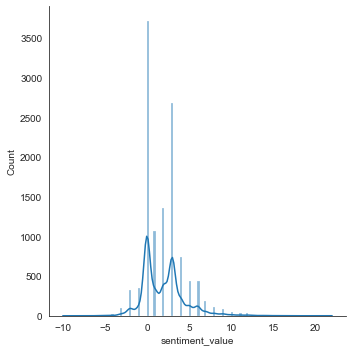

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white') 

sns.displot(data=sent_df,x='sentiment_value',kde=True)
plt.show()

In [91]:
## line plot

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

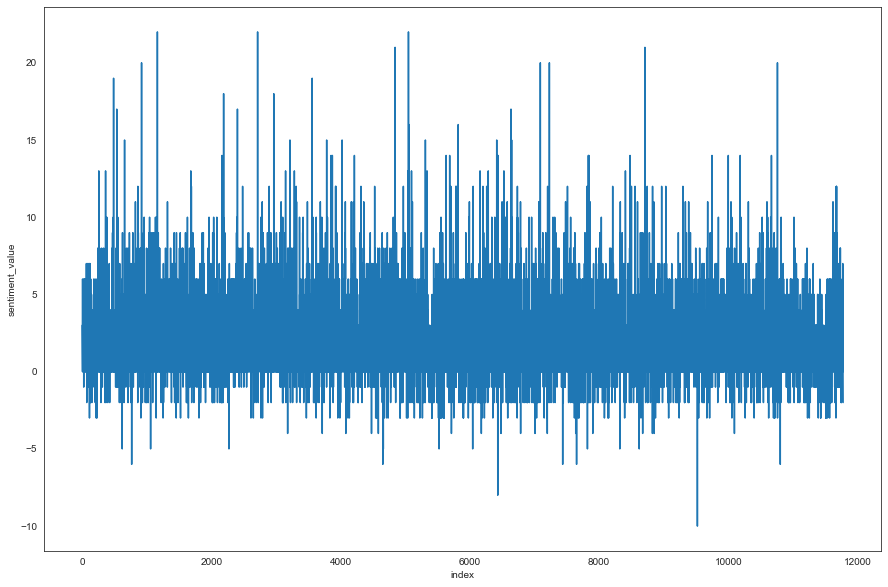

In [85]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

In [92]:
## scatter plot

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

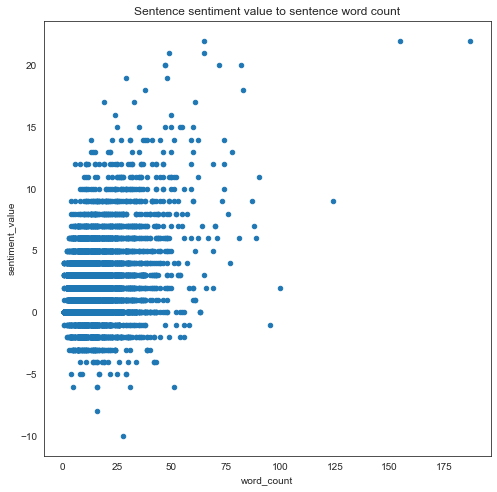

In [86]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')